#### About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

### Defining Problem Statement

#### Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

#### Objective

-  Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
- For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
df = pd.read_csv("aerofit_treadmill.csv")

#### Dataframe overview

In [3]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


### Analysing basic metrics : Exploratory Data Analysis

For solving any business case after collecting the data, we cannot immediately go on the Visualisations or model-building phase. The Exploratory Data Analysis (EDA) stage is crucial in helping us outline our strategy in an organised way. Exploratory data analysis is the process of examining data, coming up with new ideas, and spotting hidden patterns.

#### Shape of data


In [4]:
df.shape

(180, 9)

#### Data types and non-null count of all the attributes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### Conversion of categorical attributes to 'category'

In [6]:
# Converting Int data type of fitness rating to object data type
df_cat = df
df_cat['Fitness_category'] = df.Fitness
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,4
1,KP281,19,Male,15,Single,2,3,31836,75,3
2,KP281,19,Female,14,Partnered,4,3,30699,66,3
3,KP281,19,Male,12,Single,3,3,32973,85,3
4,KP281,20,Male,13,Partnered,4,2,35247,47,2


In [149]:
# Creating categories based on fitness
df_cat["Fitness_category"].replace({1:"Poor Shape", 2:"Bad Shape", 3:"Average Shape",
                                    4:"Good Shape", 5:"Excellent Shape"}, inplace=True)
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape


Categorization of Fitness Rating to following descriptive categories

- Poor Shape
- Bad Shape
- Average Shape
- Good Shape
- Excellent Shape

#### Statistical summary

In [8]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [9]:
df.describe(include='object')

,Product,Gender,MaritalStatus,Fitness_category
count,180,180,180,180
unique,3,2,2,5
top,KP281,Male,Partnered,Average Shape
freq,80,104,107,97


#### Insights

- Total count of all columns is 180.
- Mean age of the customer is 28.78 years, half of the customer's mean age is 26.
- Minimum Age of the customer starts from 18 and maximum age is 50.
- 25% of the customers age is 24.
- 75% of the customer age is 33.
- Mean Education is 15 with maximum as 21 and minimum as 12.
- Mean Usage per week is 3.4 days, with maximum as 7 and minimum as 2.
- Average rating is 3.3 on a scale of 1 to 5.
- Average Income of the purchased customer is around 54K per year.
- Average number of miles the customer walks is 103 with maximum distance travelled by most people is almost 115 and minimum is 21.
- Around 25% of the customer cover an average of 66 miles
- Most customer earns around 58K annually, with maximum of 104K and minimum almost 30K.

In [10]:
# for unique list of products, listed in percentage
sr = df['Product'].value_counts(normalize=True)
stat = sr.map(lambda calc: round(100*calc,2))
stat

KP281    44.44
KP481    33.33
KP781    22.22
Name: Product, dtype: float64

- **44.44%** of customers bought **KP281** product type
- **33.33%** of customers bought **KP481** product type
- **22.22%** of customers bought **KP781** product type

In [11]:
# Customer Gender statistics (listed in %)
gender = df['Gender'].value_counts(normalize=True)
gender_res = gender.map(lambda calc: round(100*calc,2))
gender_res

Male      57.78
Female    42.22
Name: Gender, dtype: float64

- **57.78%** of customers are **Male** and **42.22%** customers are **Female**

In [12]:
# Customers Marital Status (listed in %)
marital_status = df['MaritalStatus'].value_counts(normalize=True)
marital_status_res = marital_status.map(lambda calc:round(100*calc,2))
marital_status_res

Partnered    59.44
Single       40.56
Name: MaritalStatus, dtype: float64

- **59.44%** of customers are **Married/Partnered**
- **40.56%** of customers are **Single**

In [13]:
# Usage: Number of days used per week (listed in %)
usage = df['Usage'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
usage.rename(columns={'index':'DaysPerWeek'},inplace=True)
usage

,DaysPerWeek,Usage
0,3,38.33
1,4,28.89
2,2,18.33
3,5,9.44
4,6,3.89
5,7,1.11


- **Around 39%** of customers use **3 days per week**
- **Less than 2%** of customers use **7 days per week**

In [14]:
# Customer rating of their fitness (listed in %)
rating = df['Fitness'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
rating.rename(columns={'index':'Rating'},inplace=True)
rating

,Rating,Fitness
0,3,53.89
1,5,17.22
2,2,14.44
3,4,13.33
4,1,1.11


- **More than 53%** of customers have rated themselves as **average in fitness** (rated 3)
- **14%** of customers have rated their fitness less than average
- **Over 17%** of customers have **peak fitness ratings**

### Non-Graphical Analysis: Value counts and unique attributes

In [15]:
# Total number of unique Product ids
df['Product'].nunique()

3

In [16]:
# unique list of product ids
df['Product'].unique().tolist()

['KP281', 'KP481', 'KP781']

In [17]:
# Total number of unique ages
total_uniq_age = df['Age'].nunique()
total_uniq_age

32

In [18]:
# list of unique ages
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [19]:
# Number of Male and Female customers
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [20]:
# list of unique Educations
df['Education'].unique().tolist()

[14, 15, 12, 13, 16, 18, 20, 21]

In [21]:
# Number of customer againts the rating scale 1 to 5
df['Fitness'].value_counts().sort_index()

1     2
2    26
3    97
4    24
5    31
Name: Fitness, dtype: int64

In [22]:
# Number of customers with 3 different product types
df['Product'].value_counts().sort_index()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [23]:
# Number of customers counts on Usage
df['Usage'].value_counts().sort_index()

2    33
3    69
4    52
5    17
6     7
7     2
Name: Usage, dtype: int64

In [24]:
# Number of Single and Partnered customers
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

#### Insights

- KP281, KP481, KP781 are the 3 different products
- Most commonly purchased treadmill product type is KP281
- There are 32 unique ages
- 104 Males and 76 Females are in the customers list
- 8 unique set of Educations (14, 15, 12, 13, 16, 18, 20, 21)
- Highest rated Fitness rating is 3
- Most customers usage treadmill atleast 3 days per week
- Majority of the customers who have purchased are Married/Partnered

### Visual Analysis - Univariate & Bivariate

#### Univariate Analysis

#### For Continous Variable(s): Distplot, countplot, histogram for univariate analysis

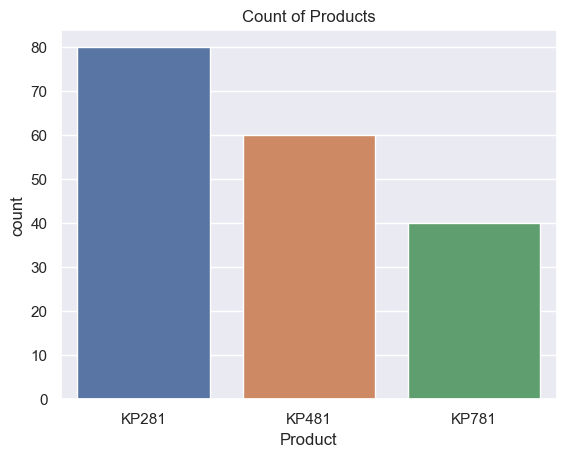

In [235]:
# Product Analysis - count plot
plt.title("Count of Products")
sns.countplot(data=df, x='Product')
plt.show()

- **KP281** is the most commonly purchase product type
- **KP481** is the second most top product type purchased
- **KP781** is the least purchased product type

#### Understanding the distribution of the data for the quantitative attributes:
- Age
- Education
- Usage
- Fitness
- Income
- Miles

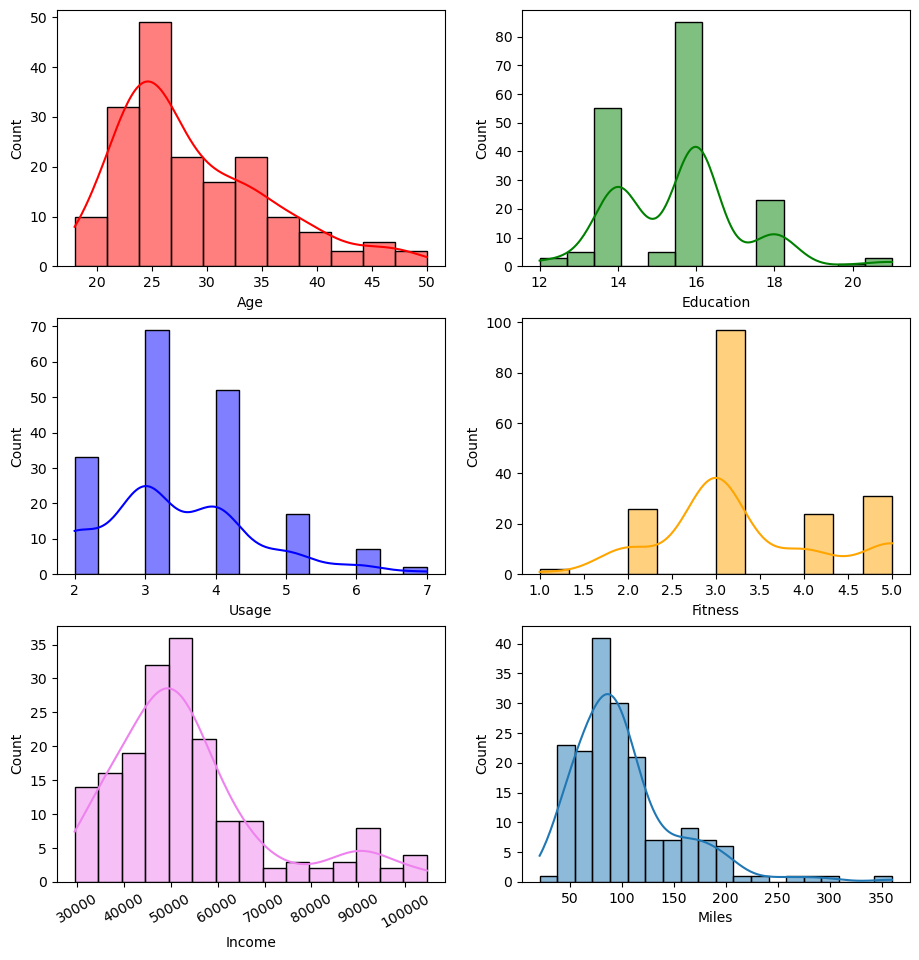

In [52]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(11, 8))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="Age", kde=True, color="r", ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, color="g", ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, color="b", ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, color="orange", ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, color="violet", ax=axis[2,0])
axis[2,0].tick_params(axis='x', labelrotation=30)
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

- Most customers are around the age of **25**.
- Most customers have completed **16 years** of education.
- Most customers have product usage around **2 years**.
- Most customers have a fitness score around **3.0**.
- **45000 to 55000** is the income range for most customers.
- Around **80 miles** is distance covered by most customers.

#### Single vs Partnered customers

In [191]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

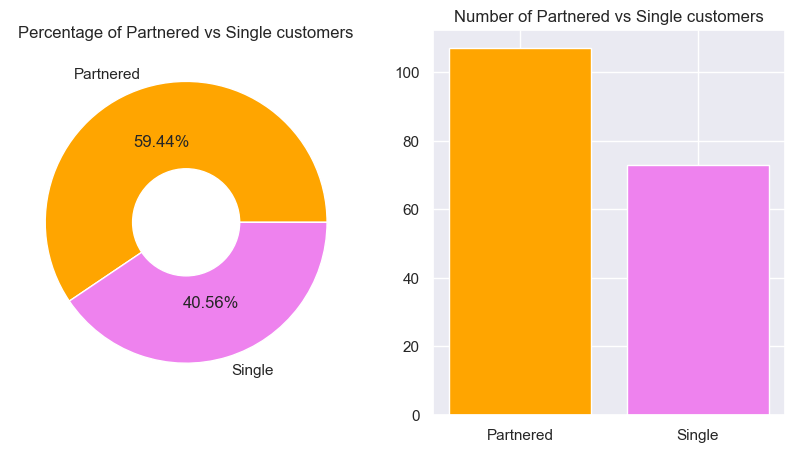

In [190]:
labels = ['Partnered', 'Single']
sizes = df['MaritalStatus'].value_counts().tolist()

# Subplots single and partnered customers
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax1.set_title("Percentage of Partnered vs Single customers")
ax2.set_title("Number of Partnered vs Single customers")

# Pie chart for the first subplot
ax1.pie(sizes, labels=labels, colors = ['orange', 'violet'], autopct="%.2f%%")
circle = plt.Circle((0, 0), 0.38, color='white')
ax1.add_artist(circle)

# Bar plot for the second subplot
ax2.bar(labels, sizes, color = ['orange', 'violet'])

plt.show()

- More products purchased by **Couples/Married/Partnered** customers

In [192]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

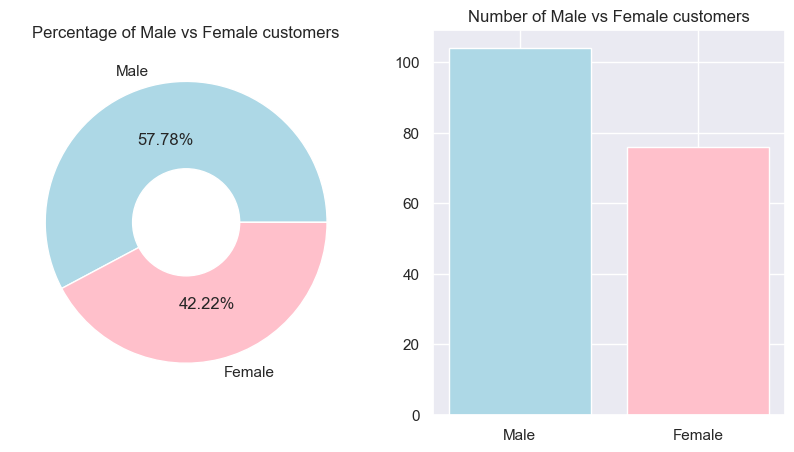

In [193]:
labels = ['Male', 'Female']
sizes = df['Gender'].value_counts().tolist()

# Subplots single and partnered customers
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax1.set_title("Percentage of Male vs Female customers")
ax2.set_title("Number of Male vs Female customers")

# Pie chart for the first subplot
ax1.pie(sizes, labels=labels, colors = ['lightblue','pink'], autopct="%.2f%%")
circle = plt.Circle((0, 0), 0.38, color='white')
ax1.add_artist(circle)

# Bar plot for the second subplot
ax2.bar(labels, sizes, color = ['lightblue','pink'])

plt.show()

- More products are purchased by **Male customers** compared to Female customers

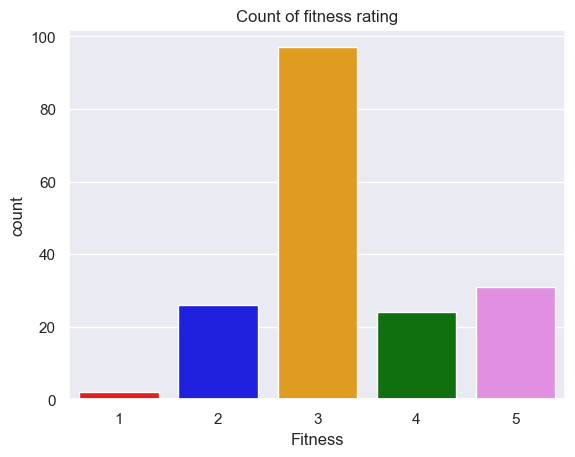

In [186]:
# Fitness rating analysis - count plot
sns.countplot(data=df,x='Fitness',palette=['red','blue', 'orange', 'green', 'violet'])
plt.title("Count of fitness rating")
plt.show()

- More than 90 customers have rated their physical fitness rating as **Average**
- **Excellent shape is the second highest** rating provided by the customers

#### Outliers detection using BoxPlots

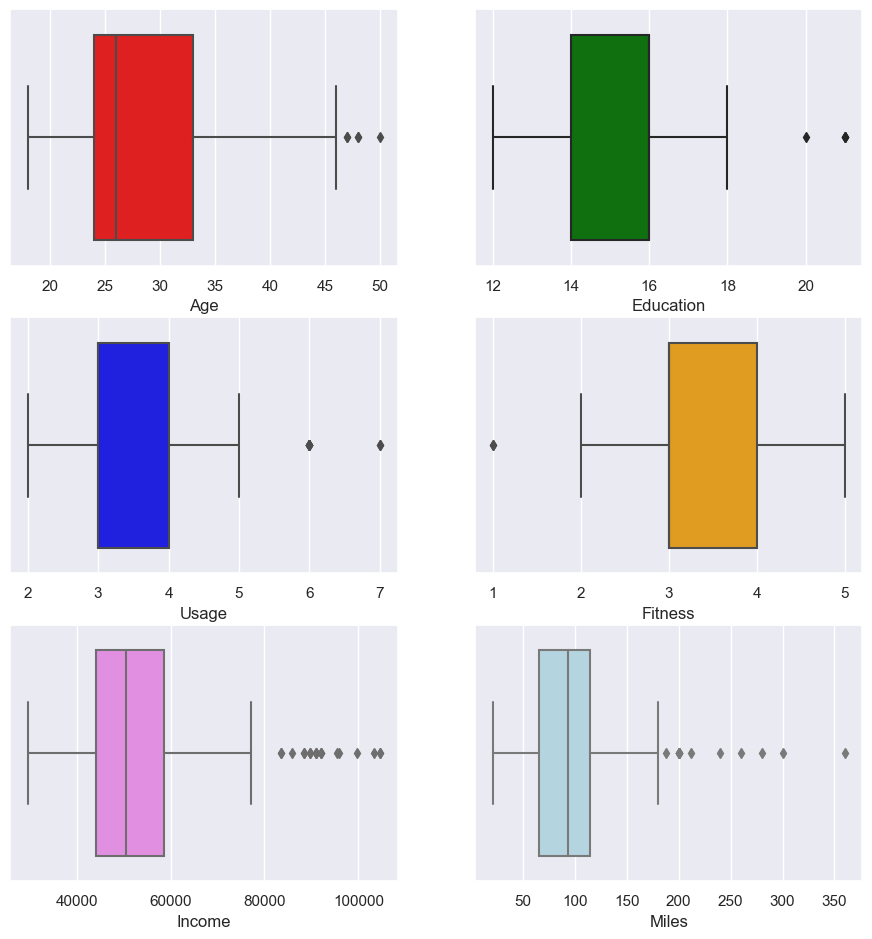

In [221]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(11, 8))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', color="red", ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', color="green", ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', color="blue", ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', color="orange", ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', color="violet", ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', color="lightblue", ax=axis[2,1])
plt.show()

- **Age**, **Education** and **Usage** have a very few outliers.
- While **Income** and **Miles** are having more outliers.

#### For correlation: Heatmaps, Pairplots

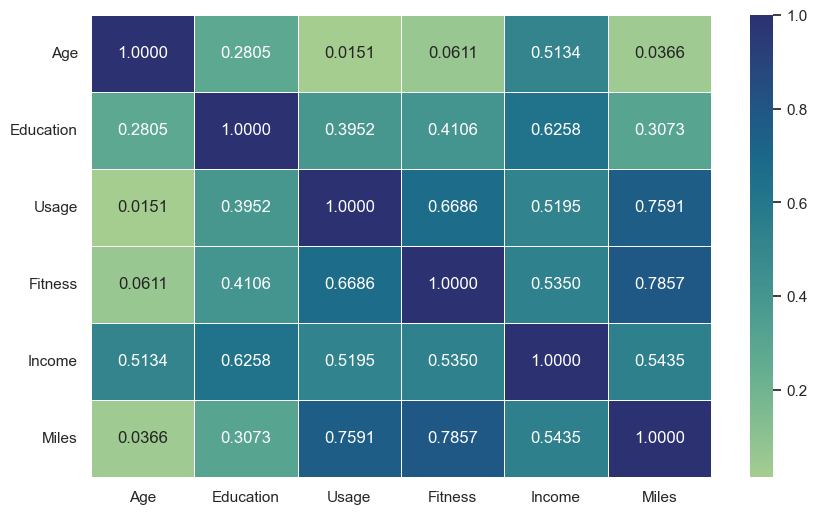

In [252]:
#Correlation HeatMap
plt.title('')
plt.figure(figsize=(10,6))
ax = sns.heatmap(df.corr(),annot=True,fmt='.4f',linewidths=.5,cmap='crest')
plt.yticks(rotation=0)
plt.show()

- Correlation between Age and Miles is 0.03
- Correlation between Education and Income is 0.62
- Correlation between Usage and Fitness is 0.66
- Correlation between Fitness and Age is 0.06
- Correlation between Income and Usage is 0.51
- Correlation between Miles and Age is 0.03

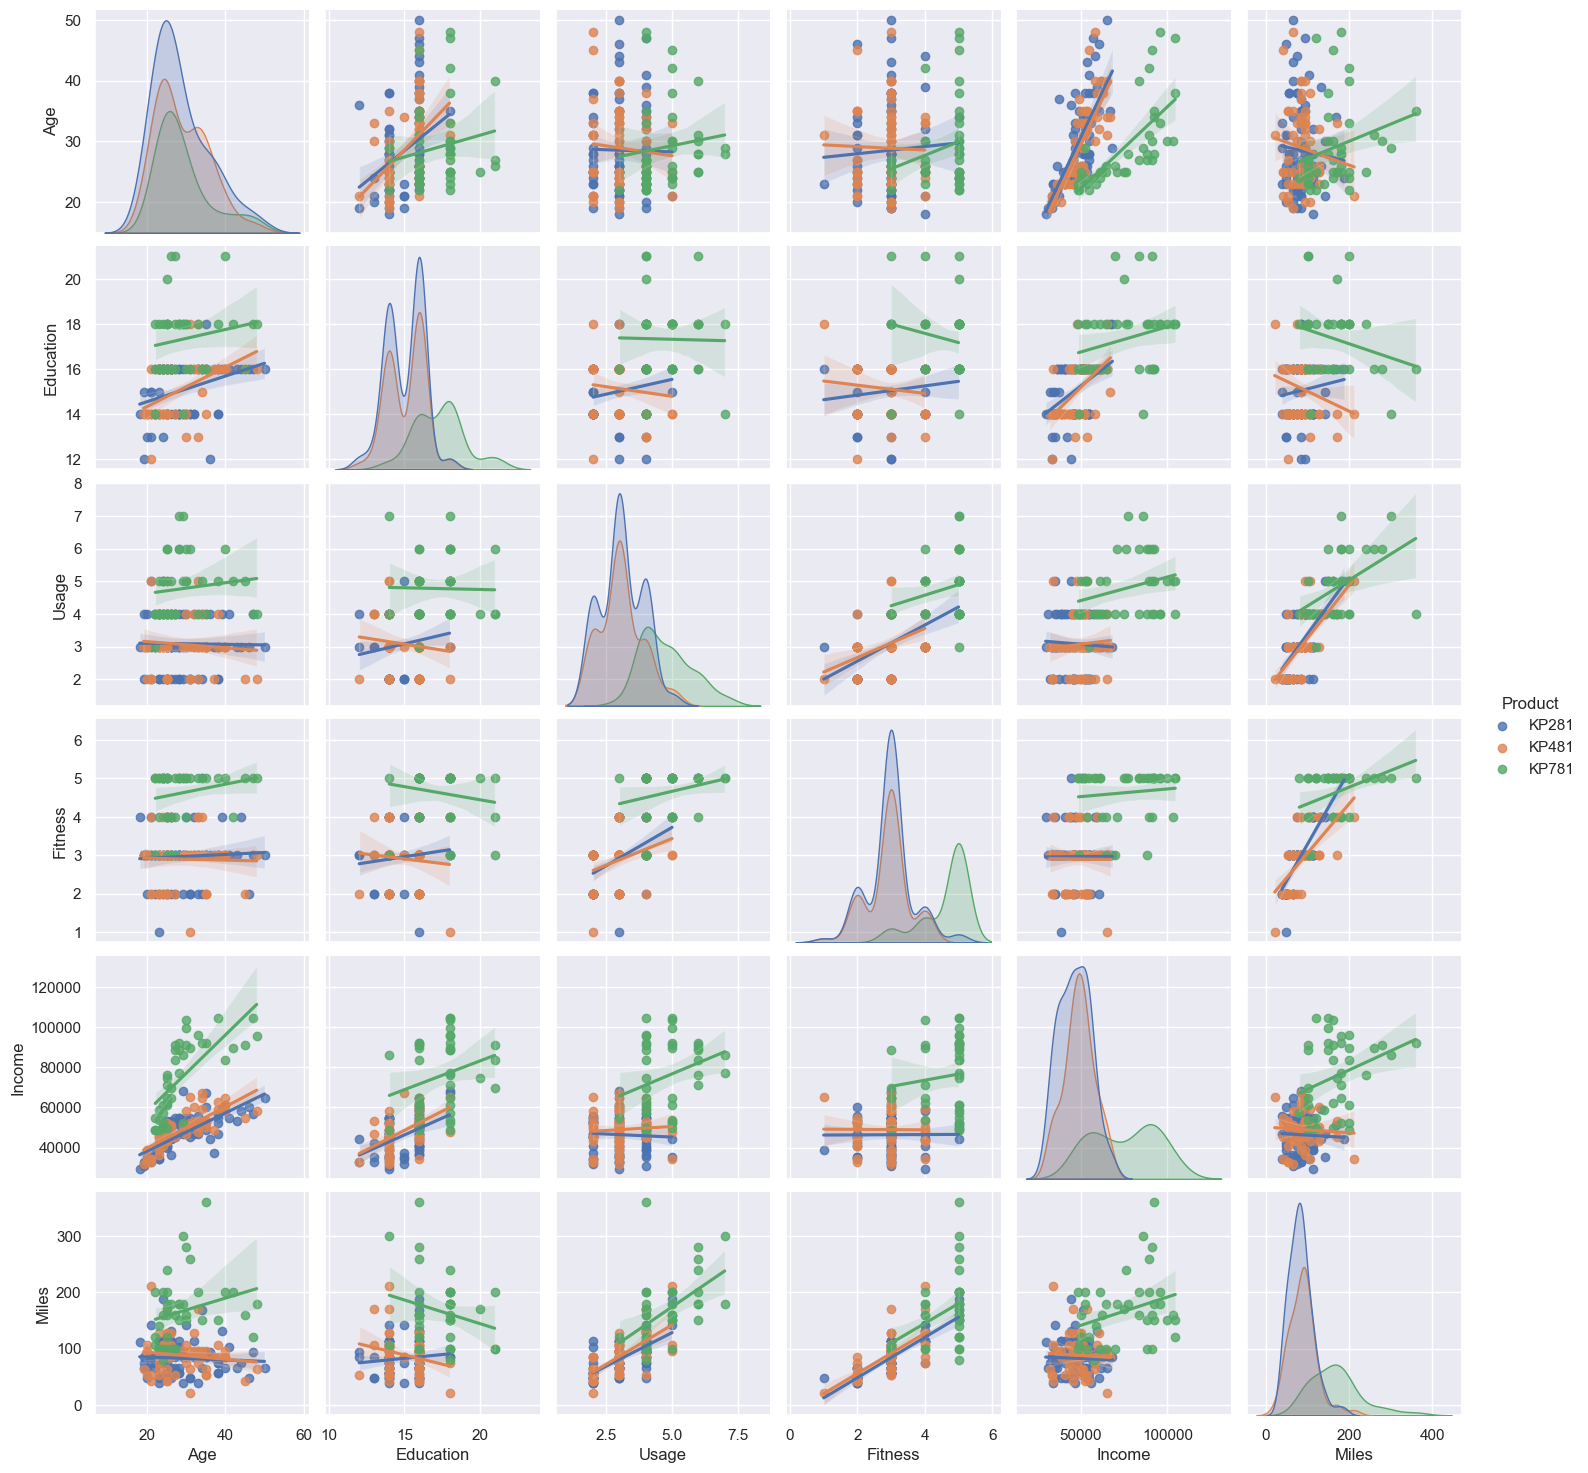

In [253]:
# Product Analysis - Pair Plot
sns.pairplot(df,hue='Product',kind='reg')
plt.show()

- In the above pairplot the correlation with products and different attributes are as similar to previous observation

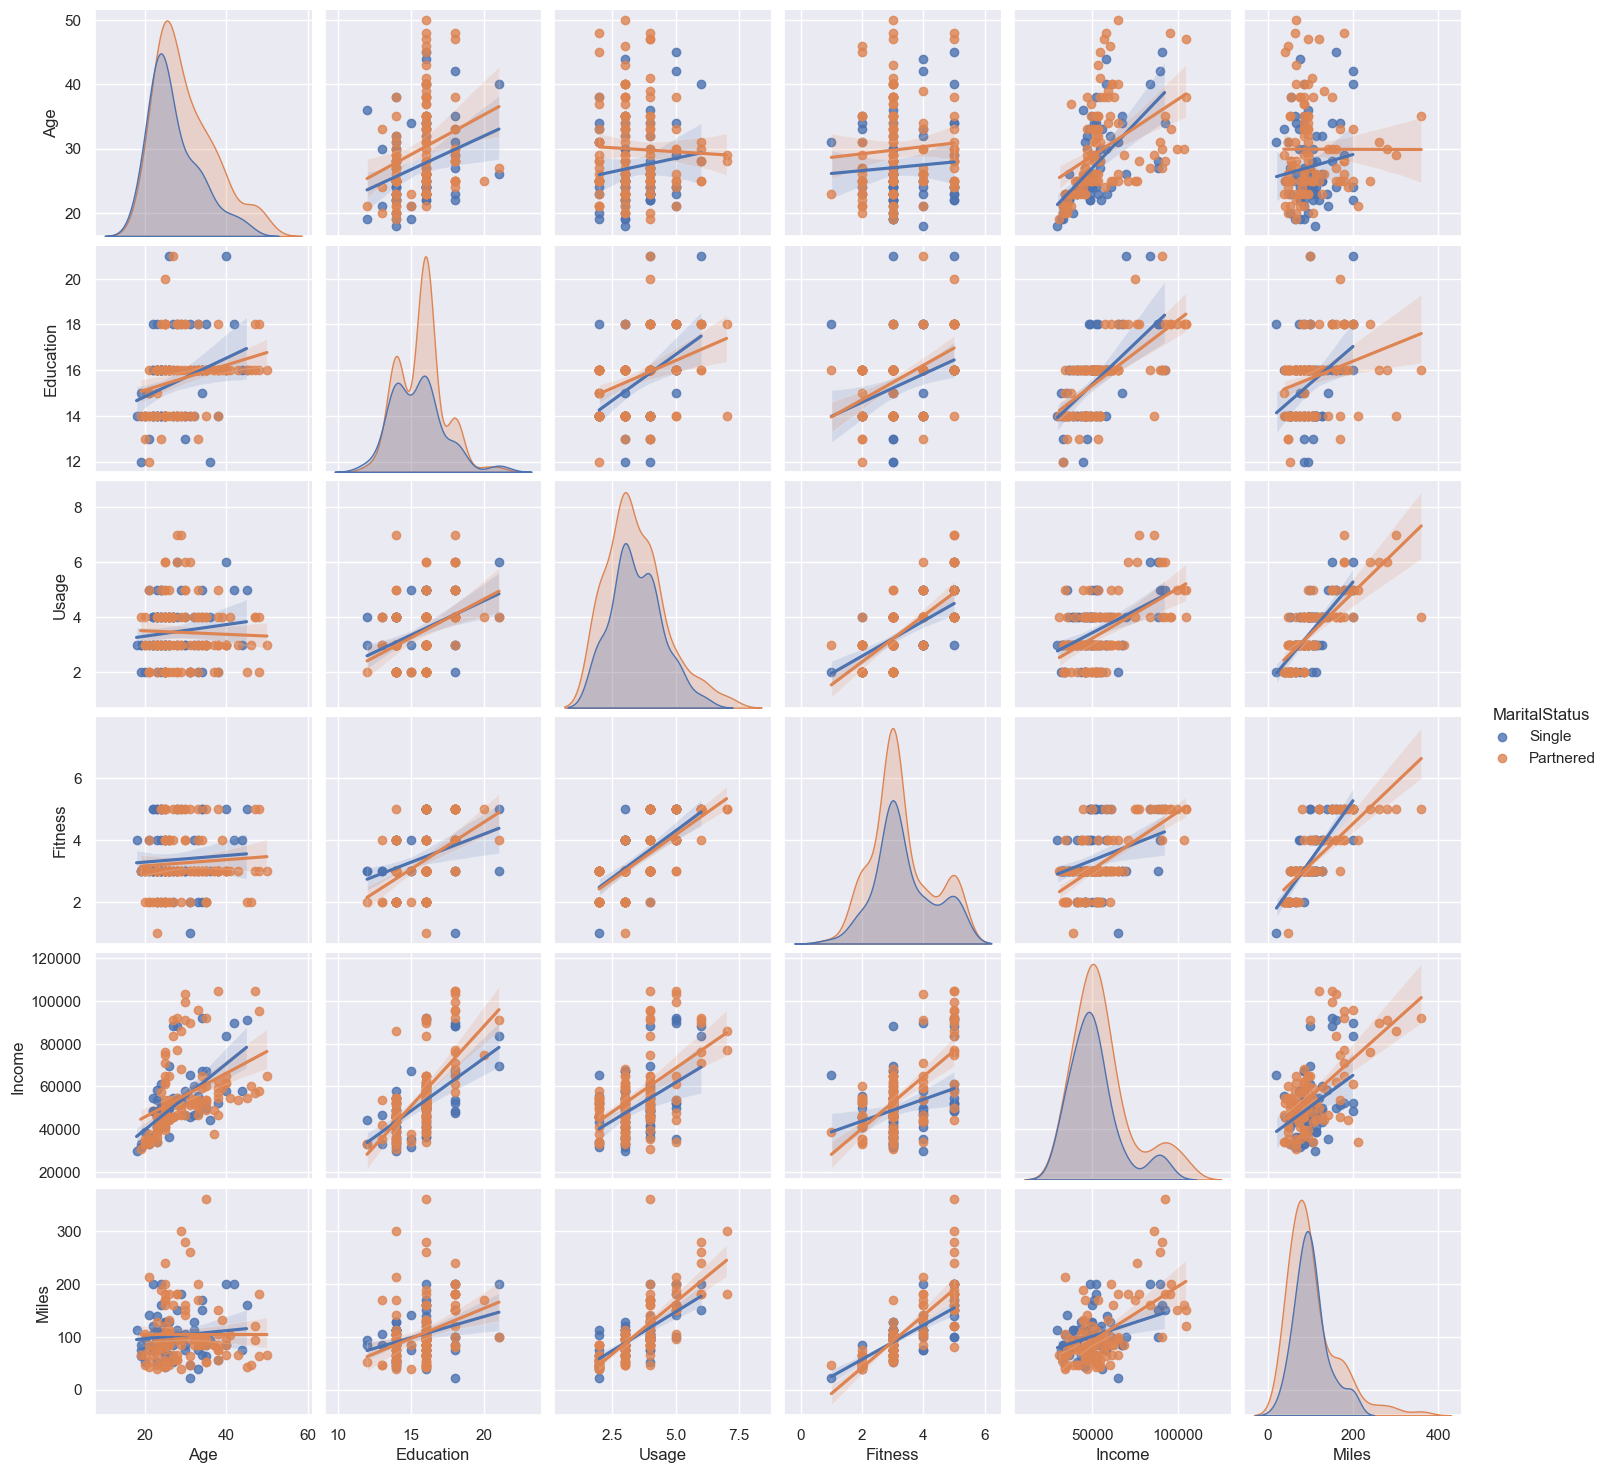

In [254]:
# Marital Status - pair plot
sns.pairplot(df,hue='MaritalStatus',kind='reg')
plt.show()

- In the above pair plot the correlation with other attributes are pivotted around the marital status of the customer

### Bivariate Analysis

In [256]:
# Average usage of each product type by the customer
df.groupby('Product')['Usage'].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

- Mean usage for product KP281 is 3.08
- Mean usage for product KP481 is 3.06
- Mean usage for product KP781 is 4.77

In [257]:
# Average Age of customer using each product
df.groupby('Product')['Age'].mean()

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

- Mean Age of the customer who purchased product KP281 is 28.55
- Mean Age of the customer who purchased product KP481 is 28.90
- Mean Age of the customer who purchased product KP781 is 29.10

In [258]:
# Average Education of customer using each product
df.groupby('Product')['Education'].mean()

Product
KP281    15.037500
KP481    15.116667
KP781    17.325000
Name: Education, dtype: float64

- Mean Education qualification of the customer who purchased product KP281 is 15.03
- Mean Education qualification of the customer who purchased product KP481 is 15.11
- Mean Education qualification of the customer who purchased product KP781 is 17.32

In [259]:
# Average customer fitness rating for each product type purchased
df.groupby('Product')['Fitness'].mean()

Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64

- Customer fitness mean for product KP281 is 2.96
- Customer fitness mean for product KP481 is 2.90
- Customer fitness mean for product KP781 is 4.62

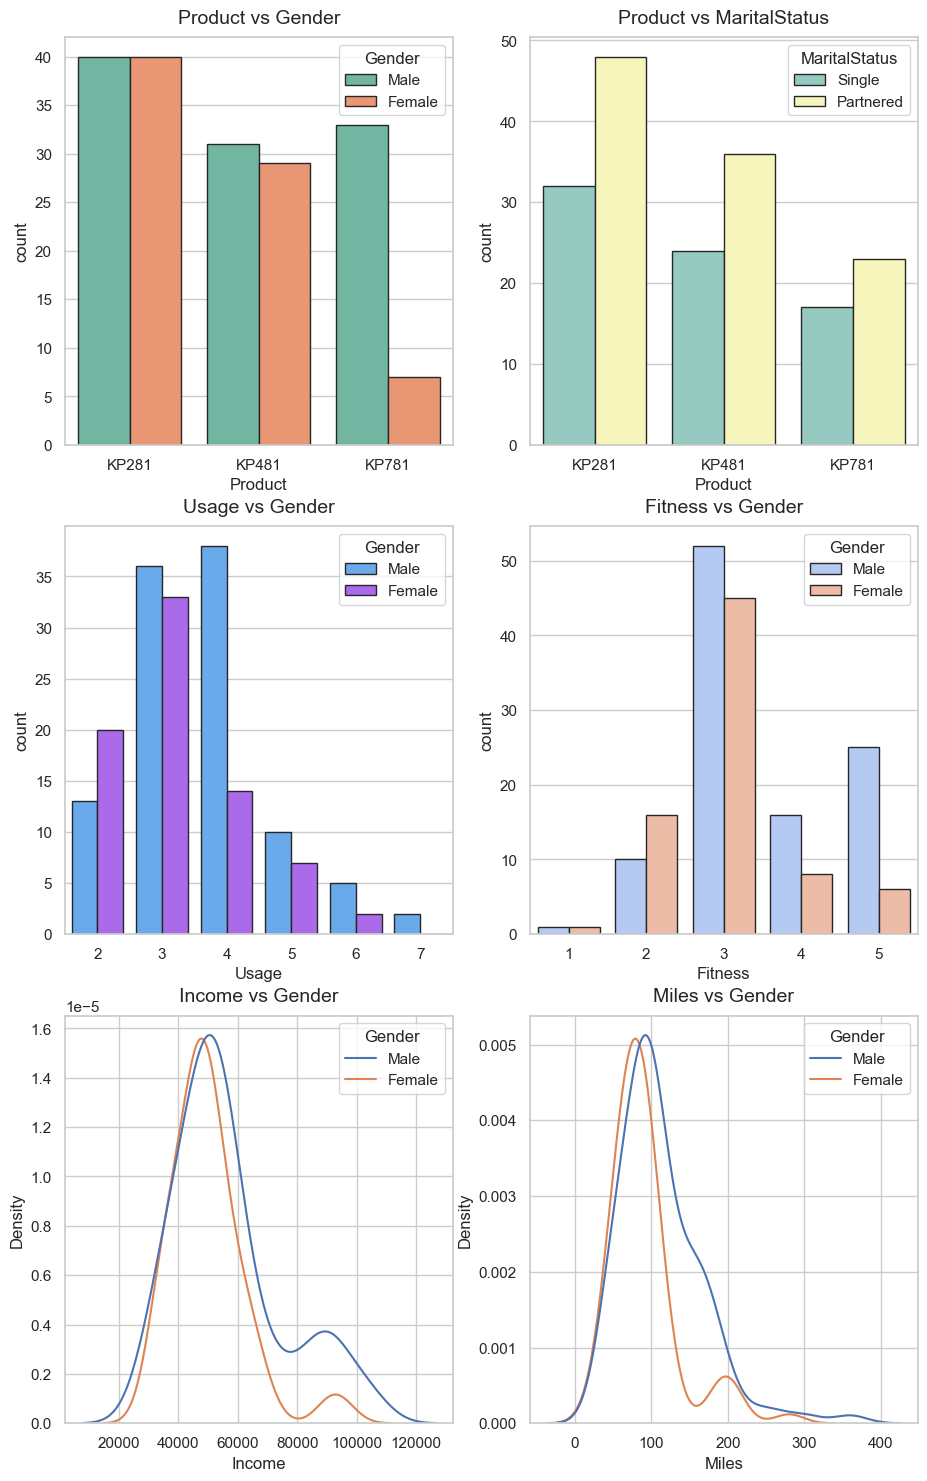

In [318]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(11, 18))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", palette='Set2', ax=axs[0,0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Set3', ax=axs[0,1])
sns.countplot(data=df,x='Usage',hue='Gender', edgecolor="0.15", palette='cool', ax=axs[1,0])
sns.countplot(data=df,x='Fitness',hue='Gender',edgecolor="0.15",palette='coolwarm',ax=axs[1,1])
sns.kdeplot(data=df,x='Income',hue='Gender',ax=axs[2,0])
sns.kdeplot(data=df,x='Miles',hue='Gender',ax=axs[2,1])

axs[0,0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[0,1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
axs[1,0].set_title("Usage vs Gender", pad=10, fontsize=14)
axs[1,1].set_title("Fitness vs Gender", pad=10, fontsize=14)
axs[2,0].set_title("Income vs Gender", pad=10, fontsize=14)
axs[2,1].set_title("Miles vs Gender", pad=10, fontsize=14)

plt.show()

**Product vs Gender**
- Equal number of males and females have purchased KP281 product and Almost same for the product KP481
- Most of the Male customers have purchased the KP781 product.

**Product vs MaritalStatus**
- Customer who is Partnered, is more likely to purchase the product.

**Gender vs Usage**
- Among Male and Female genders, Male's usage is 4 days per week
- Female customers mostly use 3 days per week
- Only few Male customers use 7 days per week whereas female customer's maximum usage is only 6 days per week

**Gender vs Fitness**
- Among the fitness rating both Male and Female most have rated as average
- Significant number of Male customers are at Excellent shape compared to Female customers

**Income vs Gender**
- From the above diagram, we can conclude the spike from 40K to around 80K is the most common income per annum of the customers

**Miles vs Gender**
- Male customers have a consistent distance coverage than female customers
- Female customers have max distance covered as just over 300 miles

**Checking if following features have any effect on the product purchased:**
1. Age
2. Education
3. Usage
4. Fitness
5. Income
6. Miles

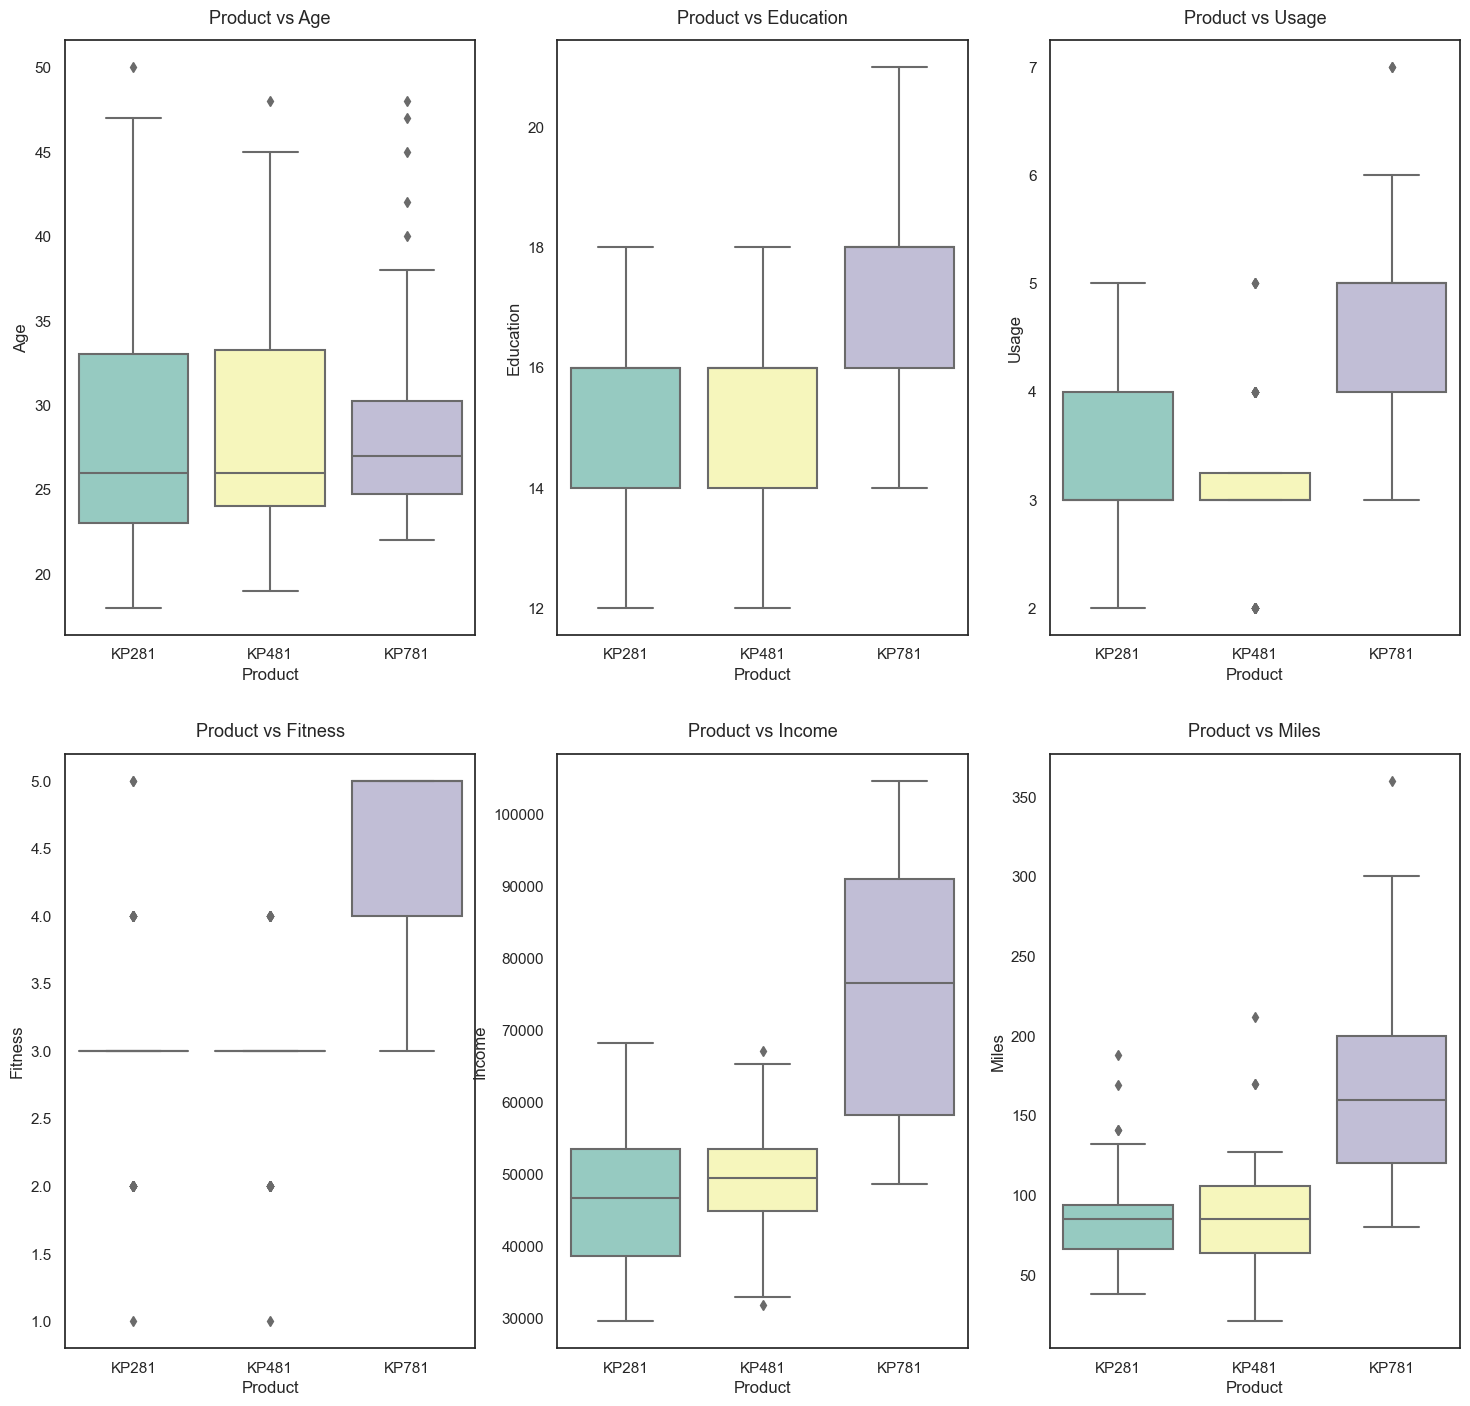

In [262]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

**Observations**
1. **Product vs Age**
- Customers purchasing products KP281 & KP481 are having same Age median value.
- Customers whose age lies between 25-30, are more likely to buy KP781 product
2. **Product vs Education**
- Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
- While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.
3. **Product vs Usage**
- Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
- While the other customers are likely to purchasing KP281 or KP481.
4. **Product vs Fitness**
- The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.
5. **Product vs Income**
- Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.
6. **Product vs Miles**
- If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.

#### Multivariate Analysis

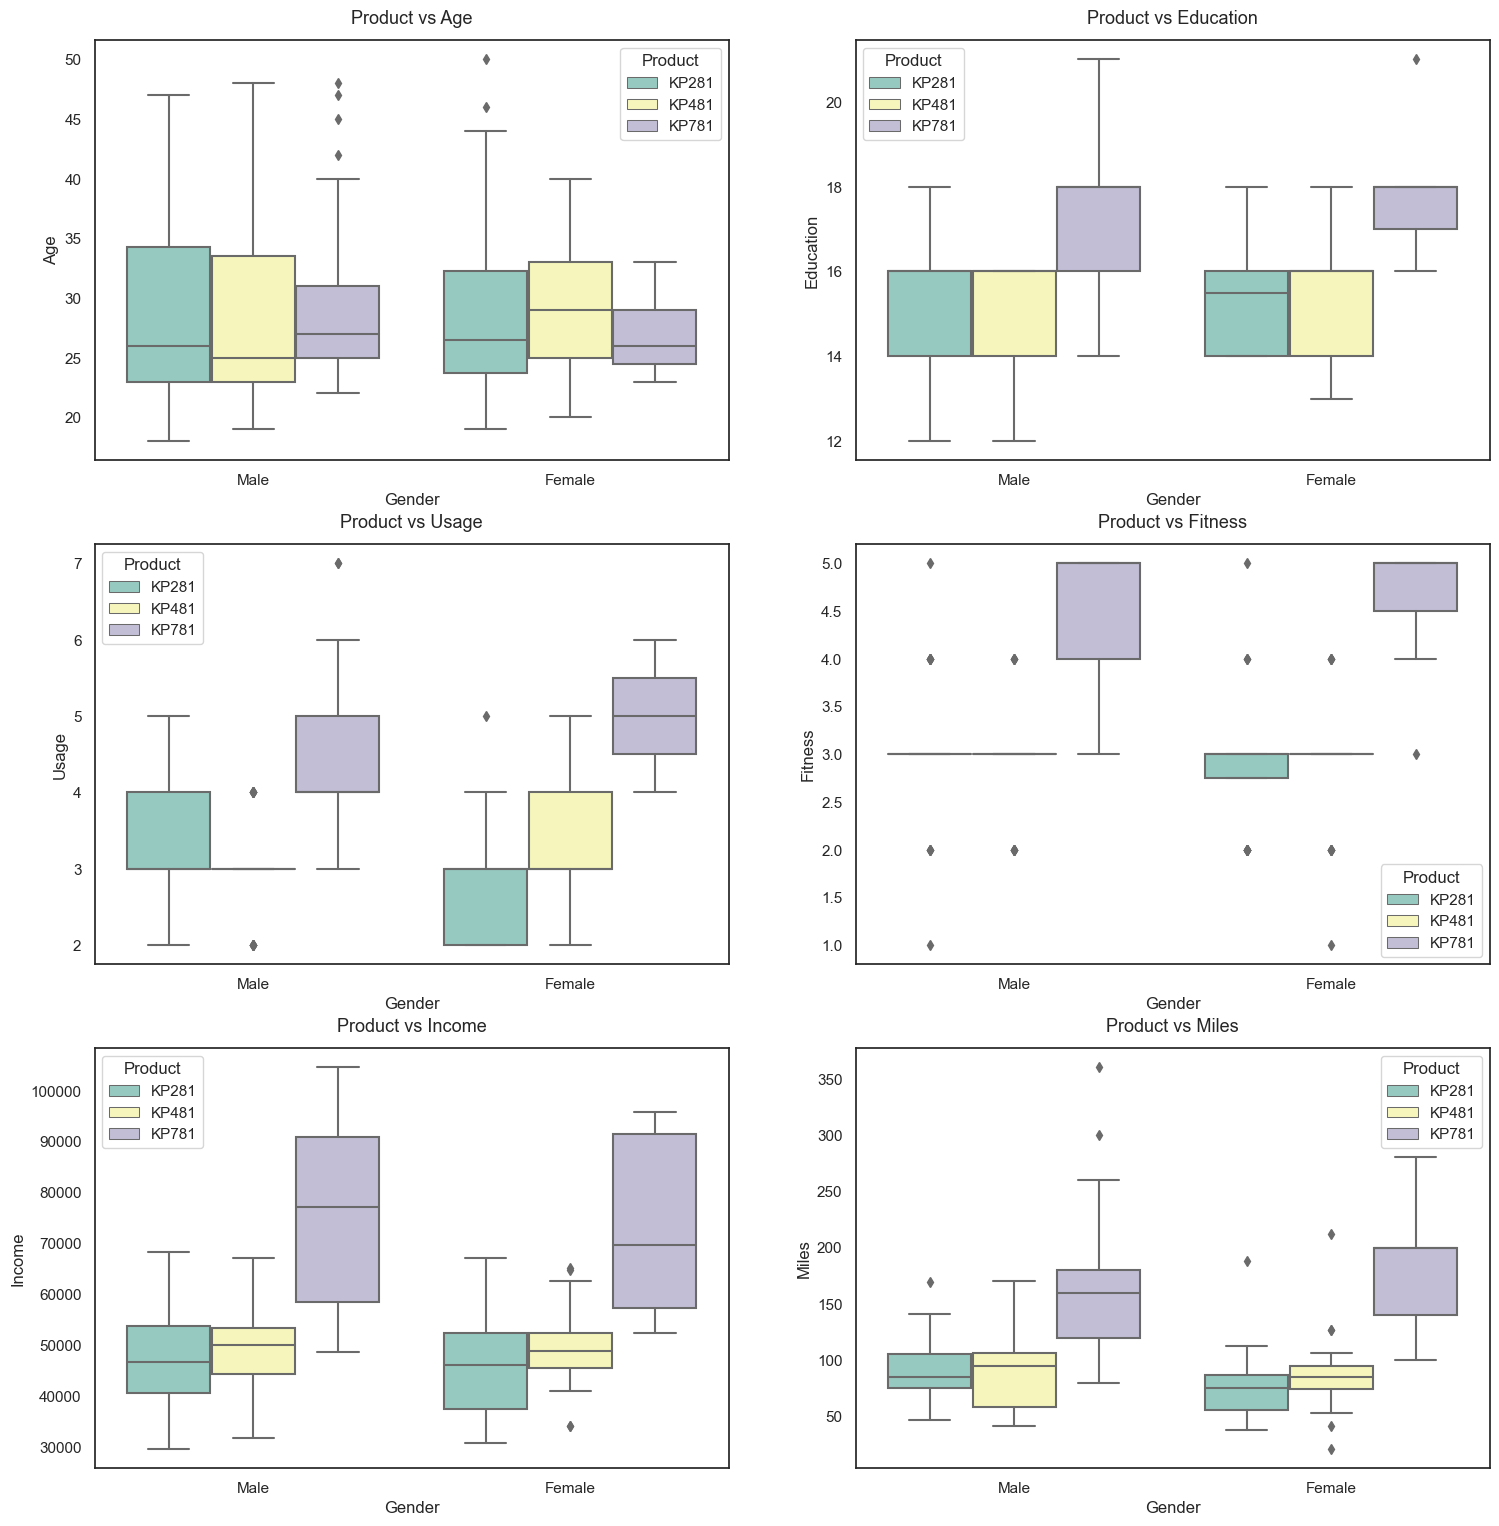

In [263]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=attrs[count], hue='Product', ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

- Females planning to use treadmill 3-4 times a week, are more likely to buy **KP481** product

### Missing Value & Outlier Detection

In [270]:
df.isna().sum()

Product             0
Age                 0
Gender              0
Education           0
MaritalStatus       0
Usage               0
Fitness             0
Income              0
Miles               0
Fitness_category    0
dtype: int64

In [272]:
df.duplicated().sum()

0

No duplicates have been observed

**Outliers**

In [273]:
# Outlier calculation for Miles using Inter Quartile Range
q_75, q_25 = np.percentile(df['Miles'], [75 ,25])
miles_iqr = q_75 - q_25
print("Inter Quartile Range for Miles is", miles_iqr)

Inter Quartile Range for Miles is 48.75


### Probability and Statistical Analysis

In [274]:
df.Product.value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

Probability of buying **KP281, KP481 & KP781** are **0.44, 0.33 & 0.22** respectively

In [276]:
df.Gender.value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

- Probability of Male customer is 0.57
- Probability of Female customer is 0.42

In [277]:
df.MaritalStatus.value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

- Probability of Married/Partnered is 0.59
- Probability of Single is 0.40

**Probability for each product for the both genders**

In [278]:
def gender_Probability(gender,df):
    print(f"Prob P(KP781) for {gender}: {round(df['KP781'][gender]/df.loc[gender].sum(),3)}")
    print(f"Prob P(KP481) for {gender}: {round(df['KP481'][gender]/df.loc[gender].sum(),3)}")
    print(f"Prob P(KP281) for {gender}: {round(df['KP281'][gender]/df.loc[gender].sum(),3)}")
    
df_temp = pd.crosstab(index=df['Gender'],columns=[df['Product']])
print("Prob of Male: ",round(df_temp.loc['Male'].sum()/len(df),3))
print("Prob of Female: ",round(df_temp.loc['Female'].sum()/len(df),3))
print()
gender_Probability('Male',df_temp)
print()
gender_Probability('Female',df_temp)

Prob of Male:  0.578
Prob of Female:  0.422

Prob P(KP781) for Male: 0.317
Prob P(KP481) for Male: 0.298
Prob P(KP281) for Male: 0.385

Prob P(KP781) for Female: 0.092
Prob P(KP481) for Female: 0.382
Prob P(KP281) for Female: 0.526


**Probability of each product for given Marital Status**

In [280]:
def MS_Probability(ms_status,df):
    print(f"Prob P(KP781) for {ms_status}: {round(df['KP781'][ms_status]/df.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP481) for {ms_status}: {round(df['KP481'][ms_status]/df.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP281) for {ms_status}: {round(df['KP281'][ms_status]/df.loc[ms_status].sum(),3)}")
    
df_temp = pd.crosstab(index=df['MaritalStatus'],columns=[df['Product']])
print("Prob of P(Single): ",round(df_temp.loc['Single'].sum()/len(df),3))
print("Prob of P(Married/Partnered): ",round(df_temp.loc['Partnered'].sum()/len(df),3))
print()
MS_Probability('Single',df_temp)
print()
MS_Probability('Partnered',df_temp)

Prob of P(Single):  0.406
Prob of P(Married/Partnered):  0.594

Prob P(KP781) for Single: 0.233
Prob P(KP481) for Single: 0.329
Prob P(KP281) for Single: 0.438

Prob P(KP781) for Partnered: 0.215
Prob P(KP481) for Partnered: 0.336
Prob P(KP281) for Partnered: 0.449


### Customer Age Group Analysis

In [285]:
df_cat['age_group'] = df_cat.Age
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,18
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,19
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,19
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,19
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,20


In [286]:
# 0-21 -> Teen
# 22-35 -> Adult
# 36-45 -> Middle Age
# 46-60 -> Elder Age
df_cat.age_group = pd.cut(df.age_group,bins=[0,21,35,45,60],labels=['Teen','Adult','Middle Aged','Elder'])

In [287]:
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,Teen
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,Teen
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,Teen
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,Teen
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,Teen


In [288]:
df_cat.age_group.value_counts()


Adult          135
Middle Aged     22
Teen            17
Elder            6
Name: age_group, dtype: int64

In [289]:
df_cat.loc[df_cat.Product=='KP281']["age_group"].value_counts()


Adult          56
Middle Aged    11
Teen           10
Elder           3
Name: age_group, dtype: int64

In [290]:
df_cat.loc[df_cat.Product=='KP481']["age_group"].value_counts()


Adult          45
Teen            7
Middle Aged     7
Elder           1
Name: age_group, dtype: int64

In [291]:
df_cat.loc[df_cat.Product=='KP781']["age_group"].value_counts()


Adult          34
Middle Aged     4
Elder           2
Teen            0
Name: age_group, dtype: int64

In [292]:
pd.crosstab(index=df_cat.Product,columns=df_cat.age_group,margins=True)


age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,10,56,11,3,80
KP481,7,45,7,1,60
KP781,0,34,4,2,40
All,17,135,22,6,180


In [293]:
# Conditional and Marginal Probabilities with product type and age group
np.round(pd.crosstab(index=df_cat.Product,columns=df_cat.age_group,normalize='columns',margins=True)*100,2)

age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,58.82,41.48,50.00,50.00,44.44
KP481,41.18,33.33,31.82,16.67,33.33
KP781,0.00,25.19,18.18,33.33,22.22


In [294]:
# Conditional and Marginal Probabilities with product type and age group
np.round(pd.crosstab(index=df_cat.Product,columns=df_cat.age_group,normalize=True,margins=True)*100,2)

age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,5.56,31.11,6.11,1.67,44.44
KP481,3.89,25.00,3.89,0.56,33.33
KP781,0.00,18.89,2.22,1.11,22.22
All,9.44,75.00,12.22,3.33,100.00


In [295]:
pd.crosstab(columns=df_cat["Fitness_category"],index=df_cat["Product"])

Fitness_category,Average Shape,Bad Shape,Excellent Shape,Good Shape,Poor Shape
Product,,,,,
KP281,54,14,2,9,1
KP481,39,12,0,8,1
KP781,4,0,29,7,0


In [299]:
round(pd.crosstab(index=df_cat["Product"],columns=df_cat["Fitness_category"],normalize="columns")*100,2)

Fitness_category,Average Shape,Bad Shape,Excellent Shape,Good Shape,Poor Shape
Product,,,,,
KP281,55.67,53.85,6.45,37.50,50.0
KP481,40.21,46.15,0.00,33.33,50.0
KP781,4.12,0.00,93.55,29.17,0.0


In [298]:
pd.crosstab(index=[df_cat.Product,df_cat.Fitness_category],columns=df_cat.Gender)

Gender                    Female  Male
Product Fitness_category              
KP281   Average Shape         26    28
        Bad Shape             10     4
        Excellent Shape        1     1
        Good Shape             3     6
        Poor Shape             0     1
KP481   Average Shape         18    21
        Bad Shape              6     6
        Good Shape             4     4
        Poor Shape             1     0
KP781   Average Shape          1     3
        Excellent Shape        5    24
        Good Shape             1     6

In [300]:
round(pd.crosstab(index=[df_cat.Product,df_cat.Fitness_category],columns=df_cat.Gender,normalize=True)*100,2)

Gender                    Female   Male
Product Fitness_category               
KP281   Average Shape      14.44  15.56
        Bad Shape           5.56   2.22
        Excellent Shape     0.56   0.56
        Good Shape          1.67   3.33
        Poor Shape          0.00   0.56
KP481   Average Shape      10.00  11.67
        Bad Shape           3.33   3.33
        Good Shape          2.22   2.22
        Poor Shape          0.56   0.00
KP781   Average Shape       0.56   1.67
        Excellent Shape     2.78  13.33
        Good Shape          0.56   3.33

In [301]:
round(pd.crosstab(index=[df_cat.Product,df_cat.MaritalStatus],columns=df_cat.Gender,normalize=True),2)

Gender                 Female  Male
Product MaritalStatus              
KP281   Partnered        0.15  0.12
        Single           0.07  0.11
KP481   Partnered        0.08  0.12
        Single           0.08  0.06
KP781   Partnered        0.02  0.11
        Single           0.02  0.08

### Conditional and Marginal Probabilities

**Two-Way Contingency Table**

**Marginal Probabilities**

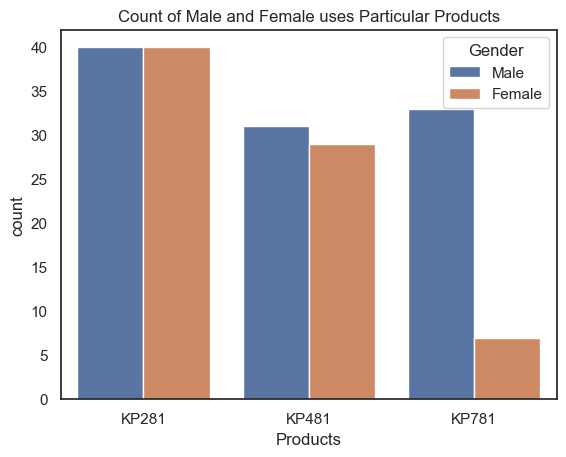

In [304]:
sns.countplot(x = "Product", data= df, hue = "Gender")
plt.xlabel("Products")
plt.title("Count of Male and Female uses Particular Products")
plt.show()

In [305]:
pd.crosstab([df.Product],df.Gender,margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [307]:
np.round(((pd.crosstab(df.Product,df.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


**Marginal Probability**

- Probability of Male Customer Purchasing any product is : 57.77 %

- Probability of Female Customer Purchasing any product is : 42.22 %

**Marginal Probability of any customer buying**

- Product KP281 is : 44.44 % (cheapest / entry level product)

- Product KP481 is : 33.33 % (intermediate user level product)

- Product KP781 is : 22.22 % (Advanced product with ease of use that help in covering longer distance)

**Conditional Probabilities**

In [308]:
np.round((pd.crosstab([df.Product],df.Gender,margins=True,normalize="columns"))*100,2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


**Probability of Selling Product**

KP281 | Female = 52 %

KP481 | Female = 38 %

KP781 | Female = 10 %

KP281 | male = 38 %

KP481 | male = 30 %

KP781 | male = 32 %

Probability of Female customer buying KP281(52.63%) is more than male(38.46%).

KP281 is more recommended for female customers.

Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

Probability of Female customer buying Product KP481(38.15%) is significantly higher than male (29.80%. )

KP481 product is specifically recommended for Female customers who are intermediate user.

### Business Insights for each product based on Non-Graphical and Visual Analysis

Customer profiling based on the 3 product categories provided

**KP281**

- Easily affordable entry level product, which is also the maximum selling product.

- KP281 is the most popular product among the entry level customers.

- This product is easily afforded by both Male and Female customers.

- Average distance covered in this model is around 70 to 90 miles.

- Product is used 3 to 4 times a week.

- Most of the customer who have purchased the product have rated Average shape as the fitness rating.

- Younger to Elder beginner level customers prefer this product.

- Single female & Partnered male customers bought this product more than single male customers.

- Income range between 39K to 53K have preferred this product.

**KP481**

- This is an Intermediate level Product.

- KP481 is the second most popular product among the customers.

- Fitness Level of this product users varies from Bad to Average Shape depending on their usage.

- Customers Prefer this product mostly to cover more miles than fitness.

- Average distance covered in this product is from 70 to 130 miles per week.

- More Female customers prefer this product than males.

- Probability of Female customer buying KP481 is significantly higher than male.

- KP481 product is specifically recommended for Female customers who are intermediate user.

- Three different age groups prefer this product - Teen, Adult and middle aged.

- Average Income of the customer who buys KP481 is 49K.

- Average Usage of this product is 3 days per week.

- More Partnered customers prefer this product.

- There are slightly more male buyers of the KP481.

- The distance travelled on the KP481 treadmill is roughly between 75 - 100 Miles. It is also the 2nd most distance travelled model.

- The buyers of KP481 in Single & Partnered, Male & Female are same.

- The age range of KP481 treadmill customers is roughly between 24-34 years.

**KP781**

- Due to the High Price & being the advanced type, customer prefers less of this product.

- Customers use this product mainly to cover more distance.

- Customers who use this product have rated excelled shape as fitness rating.

- Customer walk/run average 120 to 200 or more miles per week on his product.

- Customers use 4 to 5 times a week at least.

- Female Customers who are running average 180 miles (extensive exercise) , are using product KP781, which is higher than Male average using same product.

- Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

- Probability of a single person buying KP781 is higher than Married customers. So , KP781 is also recommended for people who are single and exercises more.

- Middle aged to higher age customers tend to use this model to cover more distance.

- Average Income of KP781 buyers are over 75K per annum

- Partnered Female bought KP781 treadmill compared to Partnered Male.

- Customers who have more experience with previous aerofit products tend to buy this product

- This product is preferred by the customer where the correlation between Education and Income is High.

### Recommendations

- Female who prefer exercising equipments are very low here. Hence, we should run a marketing campaign on to encourage women to exercise more

- KP281 & KP481 treadmills are preferred by the customers whose annual income lies in the range of 39K - 53K Dollars. These models should promoted as budget treadmills.

- As KP781 provides more features and functionalities, the treadmill should be marketed for professionals and athletes.

- KP781 product should be promotted using influencers and other international atheletes.

- Research required for expanding market beyond 50 years of age considering health pros and cons.

- Provide customer support and recommend users to upgrade from lower versions to next level versions after consistent usages.

- KP781 can be recommended for Female customers who exercises extensively along with easy usage guidance since this type is advanced.

- Target the Age group above 40 years to recommend Product KP781.